# Table of Contents
 <p><div class="lev1 toc-item"><a href="#r/depression:-Analysis-of-Sample-of-Reddit-Comments" data-toc-modified-id="r/depression:-Analysis-of-Sample-of-Reddit-Comments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>r/depression: Analysis of Sample of Reddit Comments</a></div><div class="lev1 toc-item"><a href="#Dataset-Extraction-Recap" data-toc-modified-id="Dataset-Extraction-Recap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Extraction Recap</a></div><div class="lev1 toc-item"><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary Statistics</a></div><div class="lev2 toc-item"><a href="#Investigation-of-data-quality-for-body" data-toc-modified-id="Investigation-of-data-quality-for-body-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Investigation of data quality for <code>body</code></a></div><div class="lev2 toc-item"><a href="#Distribution-of-Parent-IDs" data-toc-modified-id="Distribution-of-Parent-IDs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution of Parent IDs</a></div>

# r/depression: Analysis of Sample of Reddit Comments

_By [Michael Rosenberg](mailto:rosenberg.michael.m@gmail.com)._

_**Description**: Contains a short analysis of the reddit comment data that I extracted from [Google BigQuery](https://www.reddit.com/r/bigquery/comments/3cej2b/17_billion_reddit_comments_loaded_on_bigquery/)._

_Last Updated: 10/7/2017 2:21 PM EST._

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#helpers
sigLev = 3
%matplotlib inline
sns.set_style("whitegrid")
pd.options.display.precision = sigLev

In [3]:
#load in data
sampleFrame = pd.read_csv("../data/raw/sampleOfComments.csv")

# Dataset Extraction Recap

We downloaded this dataset on [Google BigQuery](https://www.reddit.com/r/bigquery/comments/3cej2b/17_billion_reddit_comments_loaded_on_bigquery/) using a variant of the command found [here](../code/rDepression_2017_06.sql). This dataset was extracted on 7/30/2017, although we still need to find out what timespan this dataset is extracted on.

This is a dataset of comments from the [r/depression](https://www.reddit.com/r/depression/) page. Note that this does not contain submissions, which will be extracted from another dataset later on.

# Summary Statistics

In [5]:
sampleFrame.shape

(2000, 7)

We see that this dataset contains $2000$ comments, which is a very small amount of comments for a community that has existed for $8$ years.

In [6]:
sampleFrame.columns

Index([u'body', u'author', u'created_utc', u'parent_id', u'score',
       u'subreddit', u'subreddit_id'],
      dtype='object')

We have a few variables that are relevant here:

* `body`: The text of the comment.

* `author`: the username of the author who wrote the comment.

* `created_utc`: the creation date of the comment in coordinated universal time. We will likely need to translate this into a datetime within Pandas to interpret the timeline of these comments.

* `parent_id`: the ID of the item these comment is attached to. This indicates the first comment on the particular thread.

* `score`: The score of the comment as of 7/30/2017. My best guess is that this is the sum of upvotes and downvotes on a given comment.

* `subreddit`: This is the subreddit the comment was placed on. Currently, all subreddits in this dataset should be `depression`.

* `subreddit_id`: the ID of the subreddit the comment was placed on. Again, since all subreddits in this dataset should be `depression`, we should only have one level of `subreddit_id` in this dataset.


In [13]:
#data quality check
numNullFrame = sampleFrame.apply(lambda x: x[x.isnull()].shape[0],axis = 0)
numNullFrame

body            0
author          0
created_utc     0
parent_id       0
score           0
subreddit       0
subreddit_id    0
dtype: int64

_Table 1: Number of Null observations in our dataset by column._

Thankfully, we have no areas missing in our dataset! This is a good place to be. Hopefully this doesn't mean that `NULL` values are encoded in a different manner.

In [10]:
#get number of levels
nUniqueFrame = sampleFrame.apply(lambda x: x.nunique(),axis = 0)
nUniqueFrame

body            1736
author          1223
created_utc     1998
parent_id       1765
score             42
subreddit          1
subreddit_id       1
dtype: int64

_Table 2: Number of Unique Levels per variable._

As expected, there is one level for both `subreddit` and `subreddit_id` based on our current extraction method. We also see there are $1765$ unique threads available in this dataset. We see only around $1223$ unique authors, which suggests that many of our authors are repeat visitors to the website. We also see some repeat comments on this dataset, as made apparent by the less than $2000$ unique observations in `body`. Let's investigate why `body` has many repeat comments.

## Investigation of data quality for `body`

In [14]:
bodyFrame = sampleFrame.groupby("body",as_index = False)["score"].count()
bodyFrame = bodyFrame.rename(columns = {"score":"count"})
bodyFrame = bodyFrame.sort_values("count",ascending = False)
bodyFrame

,body,count
1623,[removed],132
1622,[deleted],124
1212,Thank you.,4
1184,Thank you :),3
1183,Thank you,3
507,I feel you,2
285,Happy Birthday,2
1548,Yes.,2
1159,Stop needing someone else to make you happy. ...,1
1160,Stop putting so much pressure on yourself. If ...,1


_Table 3: Comments by count._

We see that there are a lot of [removed] and [deleted] observations in our dataset. While I don't yet know the difference between these two, they don't really express meaningful language content with the exception of context. Thus, I think I want to remove them from consideration from the dataset.

In [15]:
filteredSampleFrame = sampleFrame[~(sampleFrame["body"].isin([
                                    "[removed]","[deleted]"]))]
filteredSampleFrame.shape

(1744, 7)

## Distribution of Parent IDs

In [16]:
parentFrame = filteredSampleFrame.groupby("parent_id",as_index = False)[
                                                            "score"].count()
parentFrame = parentFrame.rename(columns = {"score":"count"})
parentFrame = parentFrame.sort_values("count",ascending = False)
parentFrame

,parent_id,count
1007,t3_6fx6lt,13
823,t3_6a7gb9,9
1498,t3_6k11nw,7
1474,t3_6ju4xs,5
1052,t3_6gan6o,5
1522,t3_6k80z1,5
1033,t3_6g573f,5
1005,t3_6fwr9s,4
865,t3_6eufvb,4
1168,t3_6hbs0u,4


_Table 4: Parent IDs by Count._

We see the most popular parent ID is associated with a [large check-in thread](https://www.reddit.com/r/depression/comments/6fx6lt/hi_rdepression_lets_check_in/). The length of this thread would explain its commonality in this dataset.

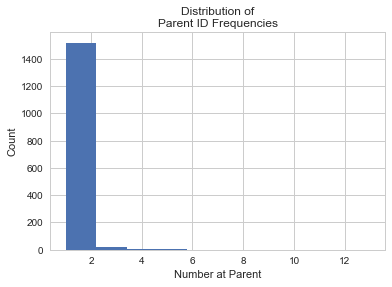

In [17]:
plt.hist(parentFrame["count"],)
plt.xlabel("Number at Parent")
plt.ylabel("Count")
plt.title("Distribution of\nParent ID Frequencies")

_Figure 1: Distribution of Parent ID Frequencies._

We see most of our observations are for parent IDs that show up a signle time in the dataset. This suggests to me that we do not have the conversational thickness that we were hoping for with this dataset. That being said, it's an extremely small sample, so likely we can't make a decision lightly about how we will analyze our data just from this.